In [43]:
import pickle as p
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt

In [44]:
D = p.load(open('Lab2/LAB2distancias002.p','rb'))
D.keys()
X = D['X']
y = D['idxClass']

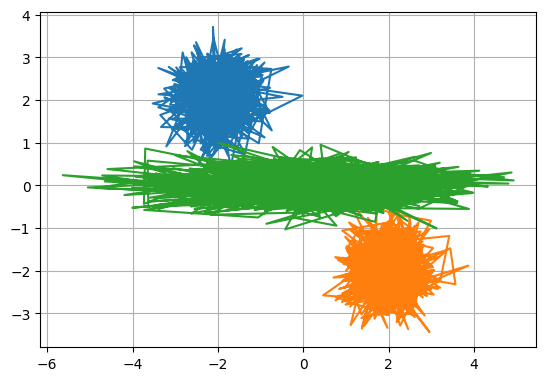

In [45]:
plt.plot(X[0,y==1],X[1,y==1])
plt.plot(X[0,y==2],X[1,y==2])
plt.plot(X[0,y==3],X[1,y==3])
plt.axis('scaled')
plt.grid(True)
plt.show()

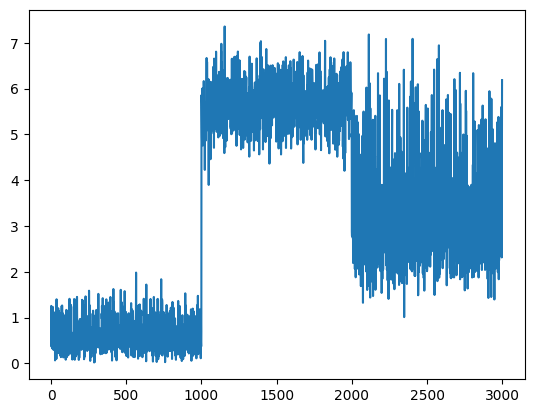

In [46]:
m1 = np.mean(X[:,y==1],axis=1)
m2 = np.mean(X[:,y==2],axis=1)
m3 = np.mean(X[:,y==3],axis=1)

m1 = np.array([-2,2])
m2 = np.array([2,-2])
m3 = np.array([0,0])
np.zeros(2)

X1 = X - m1[:,np.newaxis]
Xtmp = X1**2
Xtmp[:,5]
D1 = np.sqrt(np.sum(Xtmp, axis=0))
plt.plot(D1),plt.show()
D2 = np.sqrt(np.sum((X - m2[:,np.newaxis])**2, axis=0))
D3 = np.sqrt(np.sum((X - m3[:,np.newaxis])**2, axis=0))

[[0.81577864 1.25412754 0.36640602 0.56041472 0.87067257]
 [5.05521203 5.12736068 6.02319498 5.9422058  4.82204664]
 [2.26060429 2.43543255 3.1947716  3.13240119 2.00127515]]
[1 1 1 ... 3 2 2]


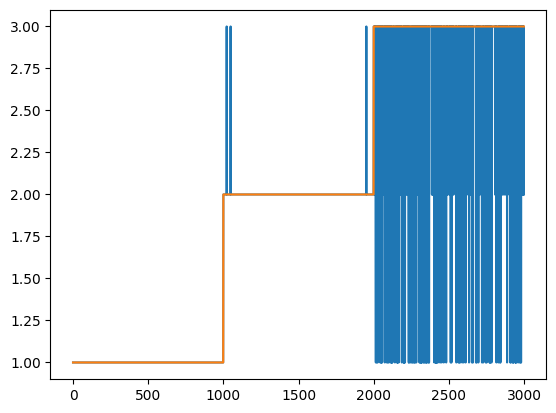

([<matplotlib.lines.Line2D at 0x1b221cf09d0>],
 None)

In [47]:
D = np.vstack((D1,D2,D3))
print(D[:,:5])
ye = np.argmin(D,axis=0)+1
print(ye)
plt.plot(ye),plt.plot(y),plt.show()

In [48]:
print("Quantos dados da classe 1, foram para a classe 1: ",np.sum(ye[y==1]==1))
print("Quantos dados da classe 1, foram para a classe 2: ",np.sum(ye[y==1]==2))
print("Quantos dados da classe 1, foram para a classe 3: ",np.sum(ye[y==1]==3))
print()
print("Quantos dados da classe 2, foram para a classe 1: ",np.sum(ye[y==2]==1))
print("Quantos dados da classe 2, foram para a classe 2: ",np.sum(ye[y==2]==2))
print("Quantos dados da classe 2, foram para a classe 3: ",np.sum(ye[y==2]==3))
print()
print("Quantos dados da classe 3, foram para a classe 1: ",np.sum(ye[y==3]==1))
print("Quantos dados da classe 3, foram para a classe 2: ",np.sum(ye[y==3]==2))
print("Quantos dados da classe 3, foram para a classe 3: ",np.sum(ye[y==3]==3))

Quantos dados da classe 1, foram para a classe 1:  1000
Quantos dados da classe 1, foram para a classe 2:  0
Quantos dados da classe 1, foram para a classe 3:  0

Quantos dados da classe 2, foram para a classe 1:  0
Quantos dados da classe 2, foram para a classe 2:  997
Quantos dados da classe 2, foram para a classe 3:  3

Quantos dados da classe 3, foram para a classe 1:  111
Quantos dados da classe 3, foram para a classe 2:  148
Quantos dados da classe 3, foram para a classe 3:  741


In [49]:
from sklearn.metrics import confusion_matrix
import numpy.random as rd
confusion_matrix(y,ye)

S1 = np.eye(2)
print(S1)

S2 = np.eye(2)/4
A = rd.randint(-5,6,(4,4))
print(A)

a = np.diag(A)
print(a)
print(np.diag(a))

S3 = np.diag(np.array([3,1/10]))
print(S3)

[[1. 0.]
 [0. 1.]]
[[-3 -1  5  0]
 [ 5 -4  0  3]
 [ 5 -5 -3  5]
 [-1  5 -3 -5]]
[-3 -4 -3 -5]
[[-3  0  0  0]
 [ 0 -4  0  0]
 [ 0  0 -3  0]
 [ 0  0  0 -5]]
[[3.  0. ]
 [0.  0.1]]


In [50]:
import scipy.linalg as la
S1i = la.inv(S1)
S2i = la.inv(S2)
S3i = la.inv(S3)

In [51]:
Xn = X - m1[:,np.newaxis]; Sn = S1i; D1 = np.sqrt(np.sum(Xn*np.dot(Sn,Xn),axis=0))
Xn = X - m2[:,np.newaxis]; Sn = S2i; D2 = np.sqrt(np.sum(Xn*np.dot(Sn,Xn),axis=0))
Xn = X - m3[:,np.newaxis]; Sn = S3i; D3 = np.sqrt(np.sum(Xn*np.dot(Sn,Xn),axis=0))

D = np.vstack((D1,D2, D3))
ye = np.argmin(D,axis=0)+1
confusion_matrix(y,ye)


array([[1000,    0,    0],
       [   0,  991,    9],
       [  35,    3,  962]], dtype=int64)

47


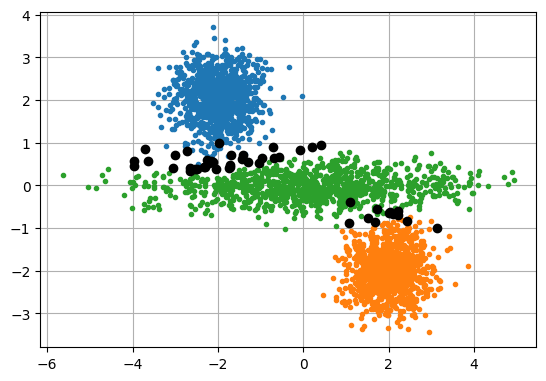

In [54]:
plt.plot(X[0,y==1],X[1,y==1],'.')
plt.plot(X[0,y==2],X[1,y==2],'.')
plt.plot(X[0,y==3],X[1,y==3],'.')
plt.plot(X[0,y!=ye],X[1,y!=ye],'ok')
print(np.sum(y!=ye))
plt.axis('scaled');plt.grid(True);plt.show()